# Support Vector Machine Algorithm

**Import Library**

In [189]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [190]:
data = pd.read_csv("winequality-red.csv")
data = pd.DataFrame(data)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Understanding

- fixed acidity (g/l): Indicates the level of non-volatile acids, mainly tartaric, malic, and citric, that contribute to the wine's sourness and tartness.

- volatile acidity (g/l): Represents the amount of volatile acids, primarily acetic acid, which can cause a vinegar-like aroma at high levels.

- citric acid (g/l): The concentration of citric acid, which adds freshness and acidity to the wine.

- residual sugar (g/l): The amount of sugar remaining after fermentation, influencing the sweetness of the wine.

- chlorides (g/l): The level of salt (chlorides) in the wine, which can affect its taste and stability.

- free sulfur dioxide (mg/l): Represents the unbound form of sulfur dioxide, a preservative commonly added to wine.

- total sulfur dioxide (mg/l): The combined amount of free and bound sulfur dioxide in the wine.

- density (g/cm^3): Indicates the wine's density, which can be related to its alcohol content and sweetness.

- pH: A measure of the wine's acidity on a scale from 0 (highly acidic) to 14 (highly basic). Wine typically falls between 3 and 4 on the pH scale.

- sulphates (g/l): The concentration of sulfate salts in the wine, potentially impacting its taste and bitterness.

- alcohol (% vol): Represents the percentage of alcohol by volume in the wine.

**Target Variable:**

quality (0-10): This is the target variable, a numerical score between 0 and 10, indicating the perceived quality of the wine based on sensory evaluation.


# Explatory Data Analysis

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**There are no null values.**

In [192]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

**Show the individual relationship the target variable has with other variables**

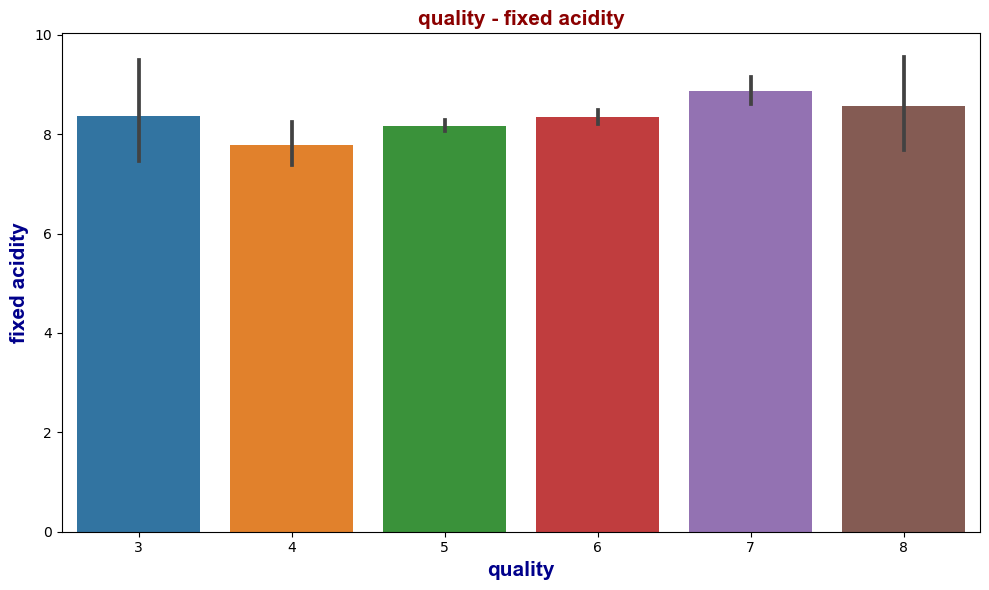

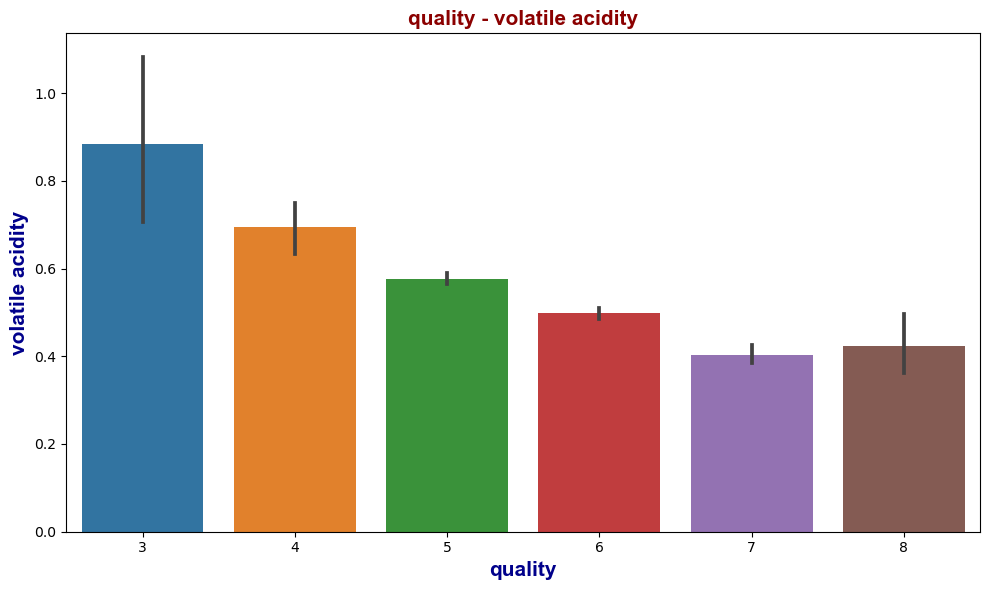

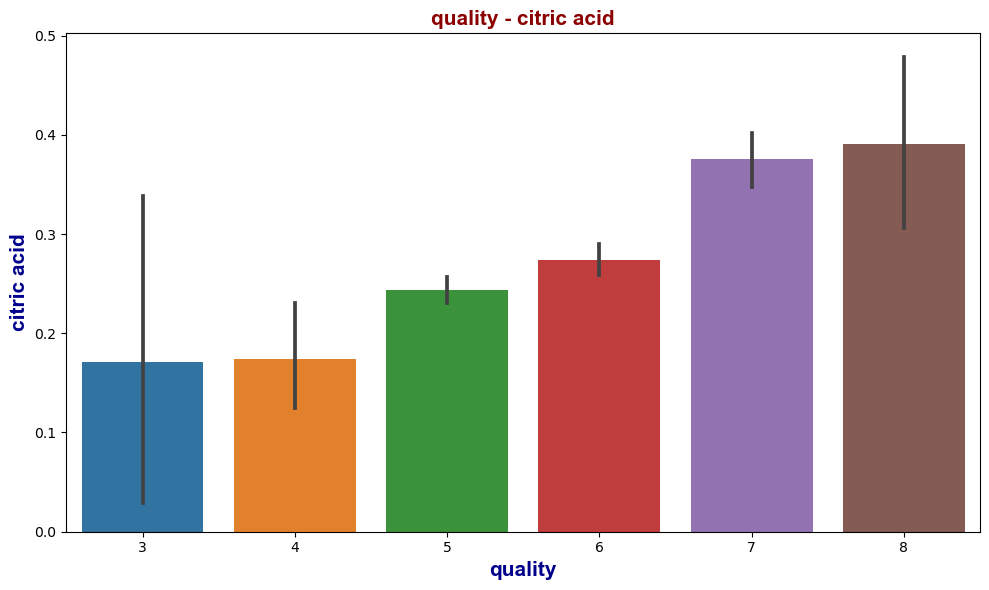

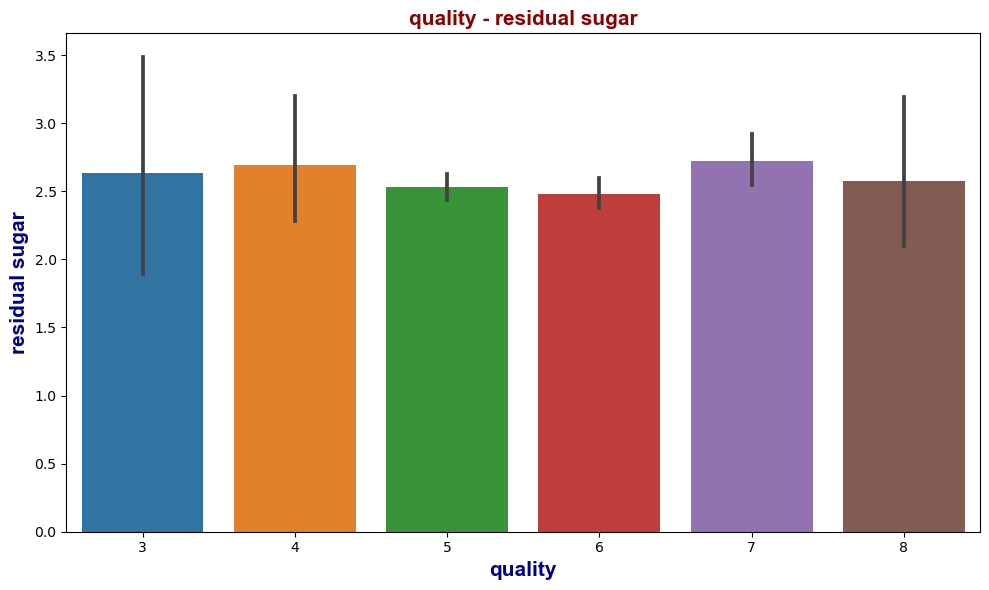

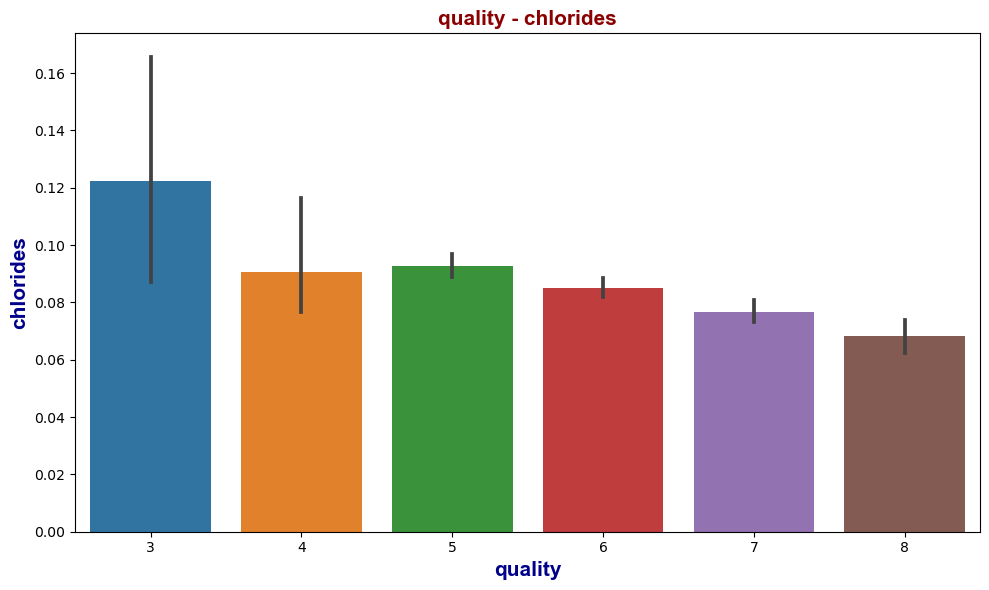

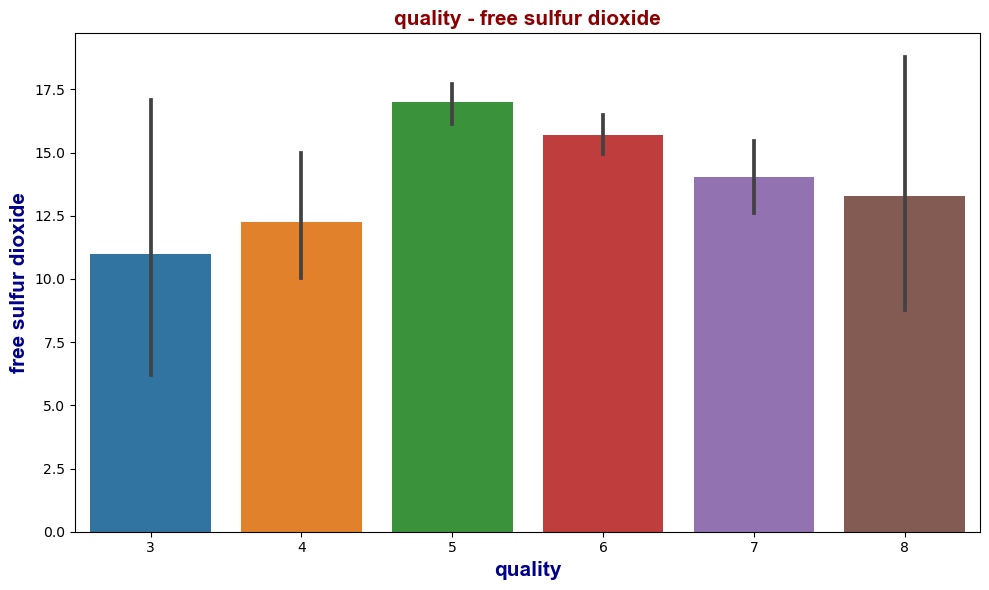

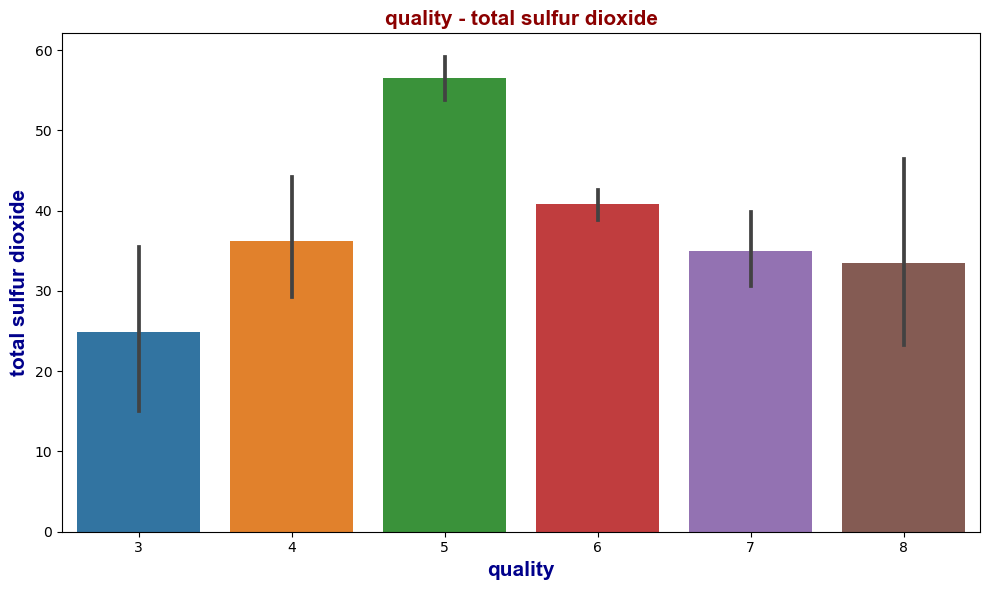

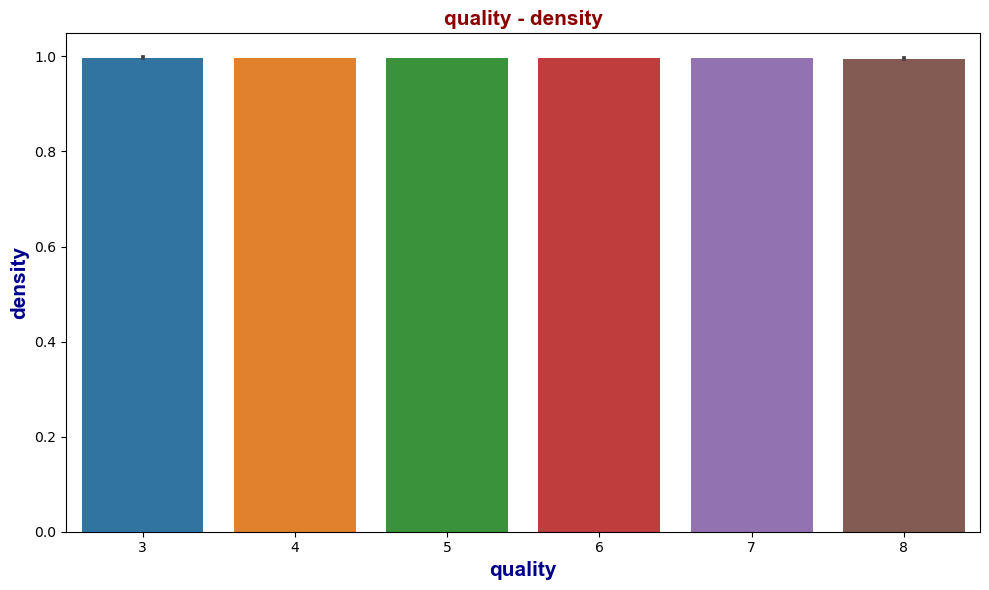

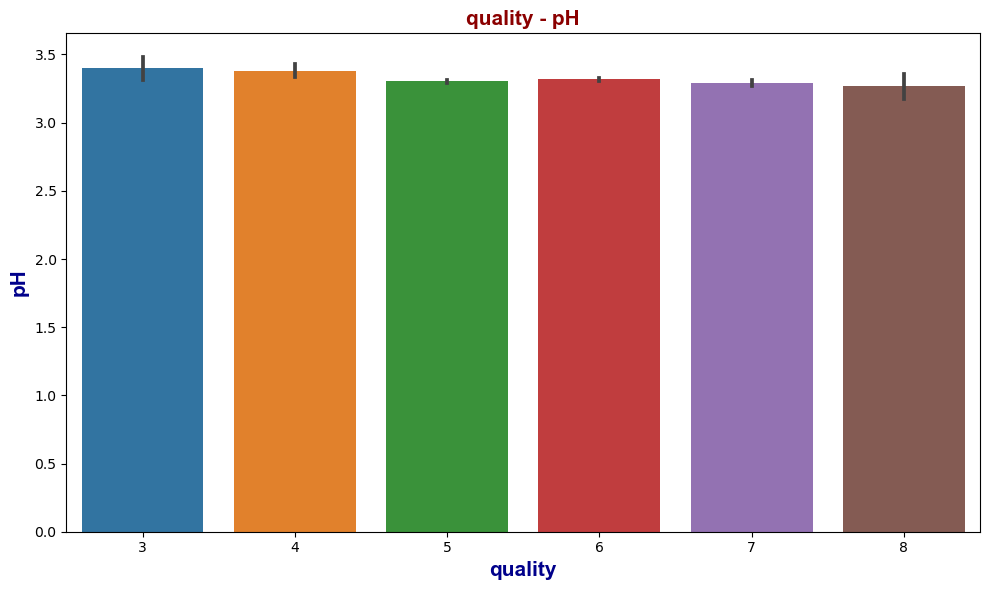

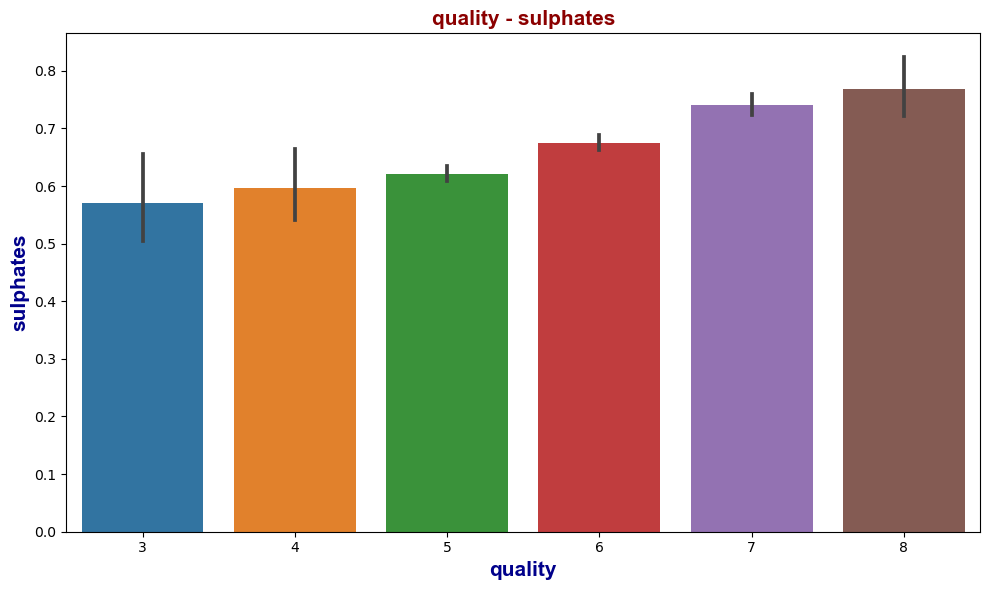

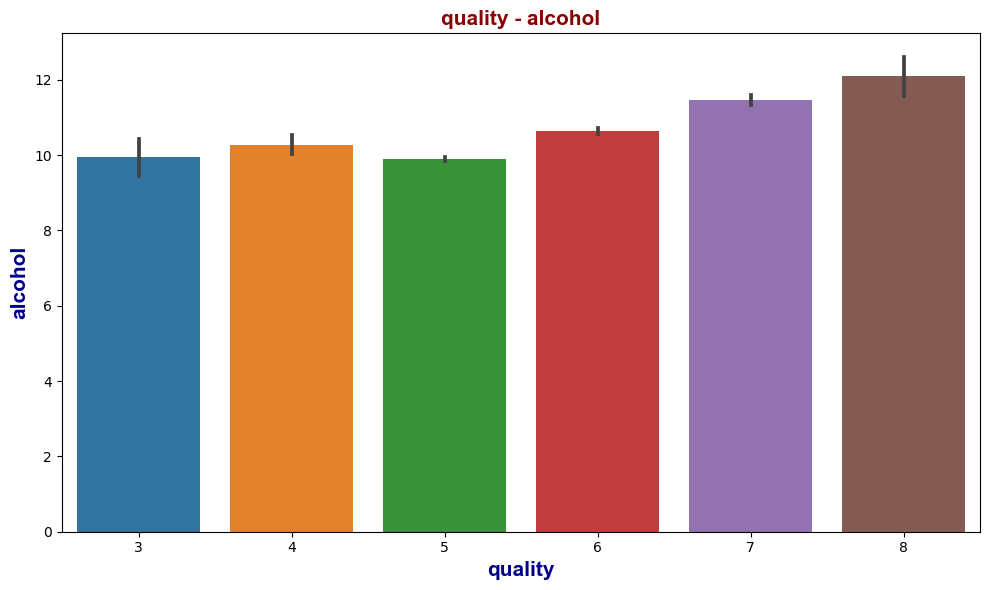

In [193]:
# Create a font dictionary
title_font = {"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font = {"family":"arial","color":"darkblue","weight":"bold","size":15}
# Create a loop that will output a bar graph
for i in data.columns[:-1]:
    plt.figure(figsize=(10,6))
    sns.barplot(x="quality", y = i,data=data)

    plt.title("quality - " + i, fontdict=title_font)
    plt.xlabel("quality", fontdict=axis_font)
    plt.ylabel(i,fontdict=axis_font)

    plt.tight_layout()
    plt.show()


**Correlation Analysis**

In [194]:
data.columns[:-1]


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [195]:
# Reorder the columns inorder to find correlation of target variable
data_copy = data.copy()

new_order =['quality','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
data_copy = data_copy.reindex(columns=new_order)

data_copy.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


<Axes: >

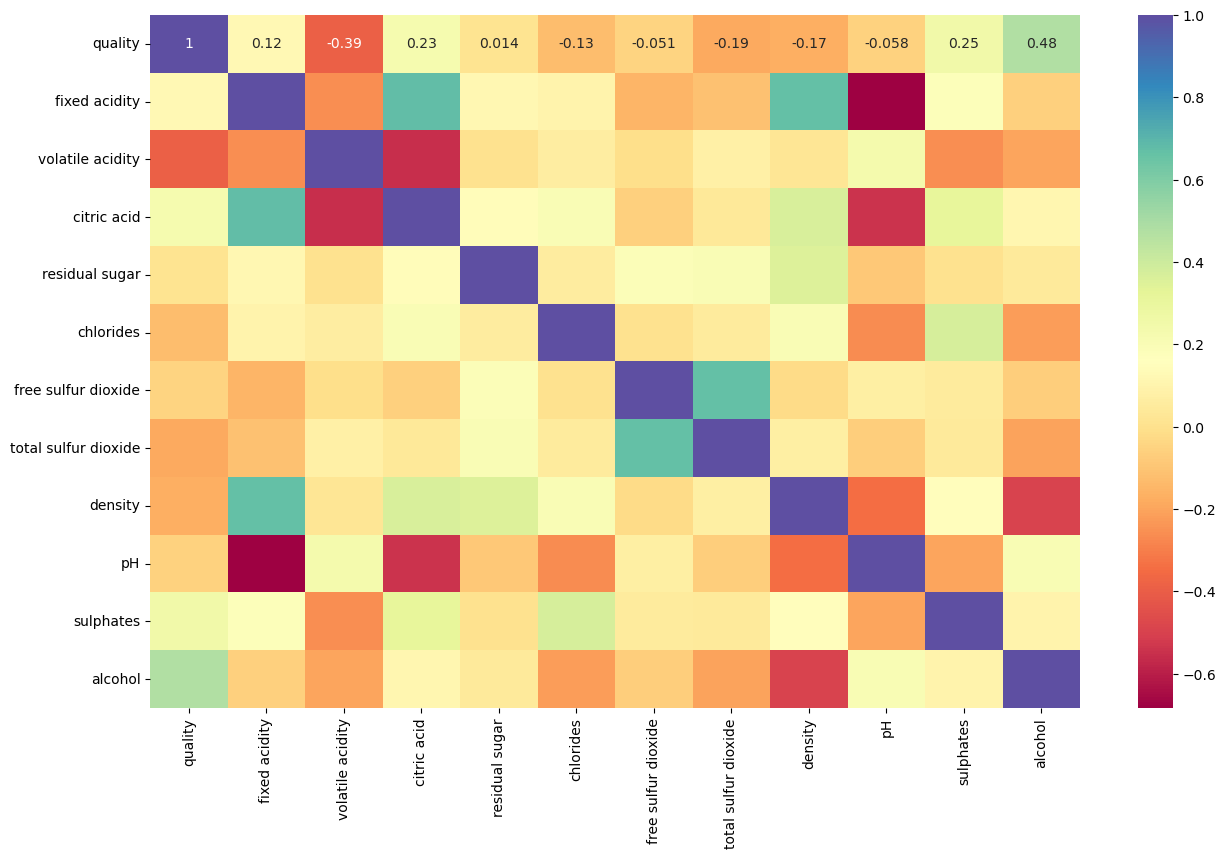

In [196]:
plt.figure(figsize=(15,9))
sns.heatmap(data_copy.corr(),cmap="Spectral",annot=True)

**Find a drop variables with low correaltion**

1. Lowest Variables(Below 0.1) are :
    - residual sugar
    - free sulfur dioxide
    - ph

In [197]:
data.drop(['residual sugar','free sulfur dioxide','citric acid','chlorides','pH'],axis=1,inplace=True)

data.head()

,fixed acidity,volatile acidity,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,34.0,0.9978,0.56,9.4,5


**Inorder for the Support Vector Algortim to be effect the target variable must be converted into binary**

- Create a criteria that classifies the quality into good and bad using the pd.cut() method

In [198]:
bins = (2,6.5,8)

group_names = ['Bad','Good']

data['quality'] = pd.cut(data['quality'],bins=bins,labels=group_names)

data.head()

,fixed acidity,volatile acidity,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,34.0,0.9978,0.56,9.4,Bad
1,7.8,0.88,67.0,0.9968,0.68,9.8,Bad
2,7.8,0.76,54.0,0.9970,0.65,9.8,Bad
3,11.2,0.28,60.0,0.9980,0.58,9.8,Bad
4,7.4,0.70,34.0,0.9978,0.56,9.4,Bad


<Axes: xlabel='quality', ylabel='count'>

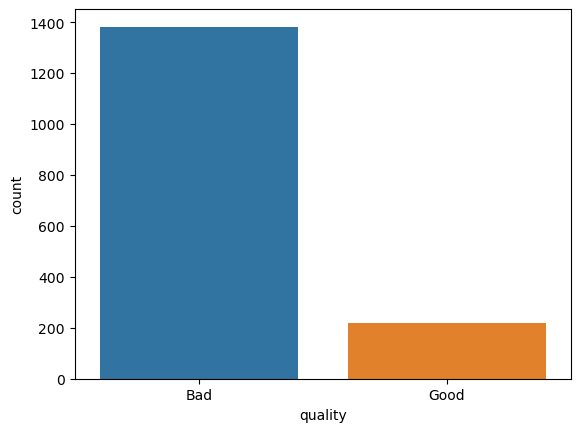

In [199]:
# Visualize the Wine Quality

sns.countplot(x='quality',data=data)

## Convert the Quality Column into Binary

- Use the from sklearn.preprocessing import LabelEncoder

In [200]:
from sklearn.preprocessing import LabelEncoder

new_quality = LabelEncoder()

In [201]:
data['quality'] = new_quality.fit_transform(data['quality'])

data.head()

,fixed acidity,volatile acidity,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,34.0,0.9978,0.56,9.4,0


In [202]:
data['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

**Train,Test and Split**

In [203]:
from sklearn.model_selection import train_test_split

X = data.drop(['quality'],axis=1)
y = data['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Scaling 
- Create a variable for the Scaler function

In [204]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# SVC Modelling

In [205]:
from sklearn.svm import SVC

svc_model = SVC()


In [206]:
svc_model.fit(X_train,y_train)

SVC()

In [207]:
y_pred = svc_model.predict(X_test)

# Model Evaluation

In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

cv_scores = cross_val_score(estimator=svc_model,X=X_train, y=y_train,cv=10)

cv_scores.mean()

0.8889886811023622

# Confusion Matrix

In [209]:
y_test.shape
y_pred.shape

(320,)

Text(0.5, 23.52222222222222, 'Predicted Labels')

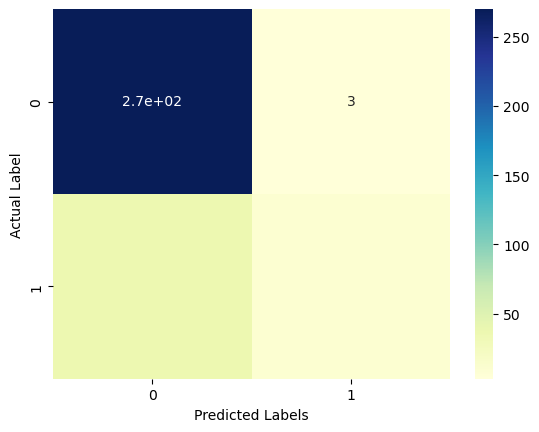

In [210]:
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix,annot=True,cmap='YlGnBu')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Labels")


In [211]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       273
           1       0.77      0.21      0.33        47

    accuracy                           0.88       320
   macro avg       0.82      0.60      0.63       320
weighted avg       0.86      0.88      0.84       320

